##Modelo de regressão linear
Usamos na previsão quantitativa. O eixo y representa uma variável dependente e o x uma variável independente. O objetivo é prever o valor de y baseado no valor de x e conforme x se altera.
o modelo constrói uma linha de regressão que busca prever com menor erro possível, por meio do least square method, o valor da observação. O erro total é a soma dos erros ao quadrado. O objetivo é obter a menor soma. 

In [2]:
#primeiramente importamos os pacotes. Caso ão estejam instalados, pip install
import pandas as pd
import seaborn as sns
publi = pd.read_csv('/content/drive/MyDrive/Arquivos intensiváo/advertising.csv')
publi.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#consultando dados da nossa tabela
print(type(publi))
print(publi.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 4)


In [4]:
#Para previsão, transformamos as colunas as colunas em lista de target e oberservações, sendo sales o target

x = publi[['TV','Radio','Jornal']]
y = publi ['Vendas']
print (x.shape)
print (y.shape)

(200, 3)
(200,)


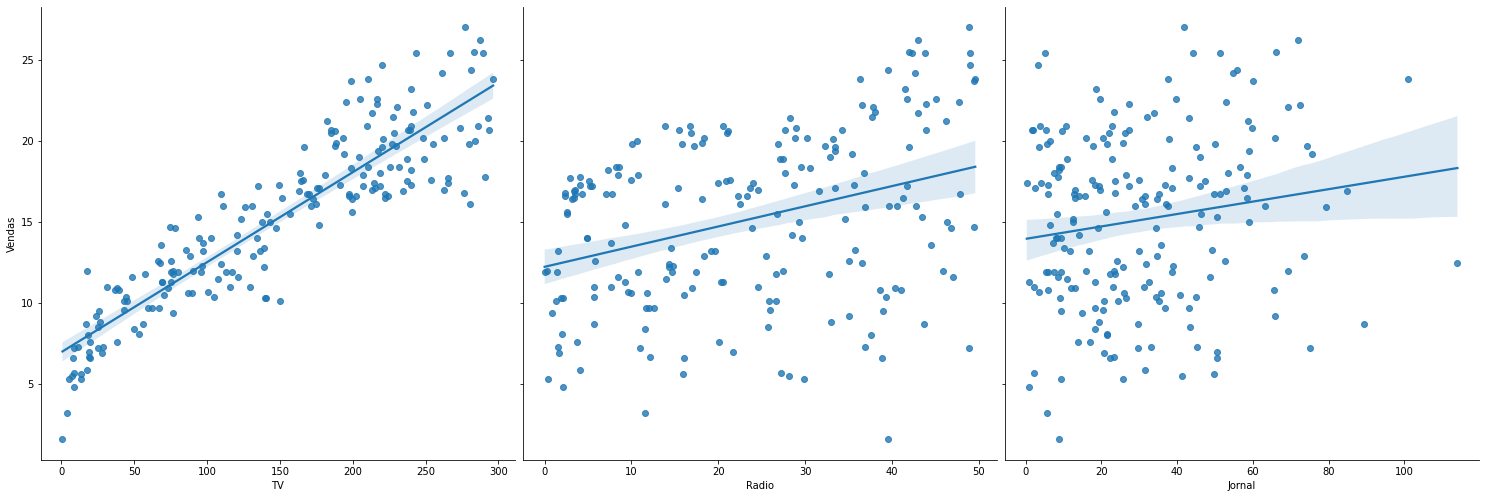

In [14]:
#vamos usar o seaborn para criar gráficos com os dados
#os eixos do gráfico são definidos nos parâmetros x_vars e y_vars. O tamaho size=x. kind='reg' adiciona uma linha de regressão
sns.pairplot(publi,x_vars=['TV','Radio', 'Jornal'], y_vars=[ 'Vendas'], size=7, kind= 'reg')
import warnings
warnings.filterwarnings('ignore')

##Treinando nossa máquina





In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

##Usamos o método fit para apresentar os dados do modelo

In [7]:
from sklearn.linear_model import LinearRegression
reglin = (LinearRegression())
reglin.fit(x_train,y_train)


LinearRegression()

##Coeficiente de aumento de vendas para cada unidade investida em publicidade

In [8]:
print (reglin.coef_)
#o parâmetro coef 
#para facilitar a visualização, usamos o parâmetro zip que vai criar uma tupla onde visualizaremos o label e os coeficientes
list(zip(['TV','Radio','Jornal'],reglin.coef_))

[ 0.05502936  0.1128066  -0.00544852]


[('TV', 0.055029360930958865),
 ('Radio', 0.11280660332308592),
 ('Jornal', -0.005448518400509403)]

##Previsão

In [9]:
#Prevendo as vendas com base em um suposto investimento
print (reglin.predict([[230.1,37.8,69.2]]))

[21.18069605]


In [10]:
#verificando os acertos com base nos valores que já temos.
y_prev = reglin.predict(x_test)
print (y_prev)

[10.37813374 12.70966414  9.0896479  18.14263175 12.22464629 10.81485151
  6.19463649 13.22132285  9.02998598 14.06573014 11.97217326  8.2052147
 11.75754391 12.88903582  6.21240163 22.62775834  9.432184    9.72363635
 11.20377243 14.68548886 22.16176777 15.48081427 18.05621459 14.20182831
 21.43711476  9.54154117 19.32358594 14.6295182  11.86996922 21.91763746
 21.59683572  7.88475136 19.07832044 15.99848273 19.38718396 21.04668055
 16.81414999 19.57158632 15.27961964 16.90123702 21.18069605 15.32922395
  9.97172492 18.28588532 17.73965245 19.39967184 16.63354931 12.59672491
 11.40979772 20.26013453 19.48359243 18.3309305  20.83716487 18.64452204
 11.36759263 17.30851054 14.43058203 18.83311349 22.09222981 15.78571359]


In [11]:
#para avaliação da perfomance vamos usar o método MAE (mean absolute error)
from sklearn import metrics
print (metrics.mean_absolute_error(y_test,y_prev))

1.2642075022300403


In [12]:
#media de erros ao quadrado
print (metrics.mean_squared_error(y_test,y_prev))

2.8968733936625424


##RMSE (root mean squared error)
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.


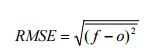

In [13]:
import numpy as np
print (np.sqrt(metrics.mean_squared_error(y_test,y_prev)))

1.7020203857952296


##Verificar se variáveis estão contribuiido para a precisão do modelo

Se retiramos uma variável e a precisão é aumentada, devemos remover essa variável. Para isso, recriamos as variáveis de X e Y e removemos alguma variável, procedendo com as análises e verificando o RMSE